In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

import pickle

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
train = pd.read_csv('data/train/train_set.csv')
test = pd.read_csv('data/test/test_set.csv')

D:\Python\Anaconda3_2020.11\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (2,3,9,10,11,12,13,14,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
with open(r"models/standardize_pitching_data.pkl", "rb") as input_file:
    model = pickle.load(input_file)

In [6]:
pitch_features = ['release_speed','release_pos_x','release_pos_z','pfx_x','pfx_z','plate_x','plate_z','vx0','vy0','vz0','ax',
                 'ay','az', 'effective_speed','release_spin_rate','release_extension','release_pos_y','spin_x', 'spin_z']
cluster_cols = [col for col in train.columns if 'cluster' in col]

In [7]:
train[pitch_features] = model.inverse_transform(train[pitch_features])

In [8]:
train.dropna(subset=pitch_features, inplace=True)

In [9]:
clusters_close = {}
n = 500

for col in cluster_cols:
    clusters_close[col] = train.nlargest(n,col)

In [10]:
def hist_graph(col):
    fig = plt.figure(figsize=(27, 22))
    
    for i in range(0,len(cluster_cols)):
        ax=fig.add_subplot(4,3,i+1)
        plt.subplot(4, 3, i+1)
        cluster_name = cluster_cols[i]
        plt.title(cluster_name)
        
        df_temp = clusters_close[cluster_name]
        
        plt.hist(df_temp[col].dropna())
        plt.margins(0.05)
    plt.show()

In [11]:
len(train.index)

3148304

# Pitch Type in Clusters

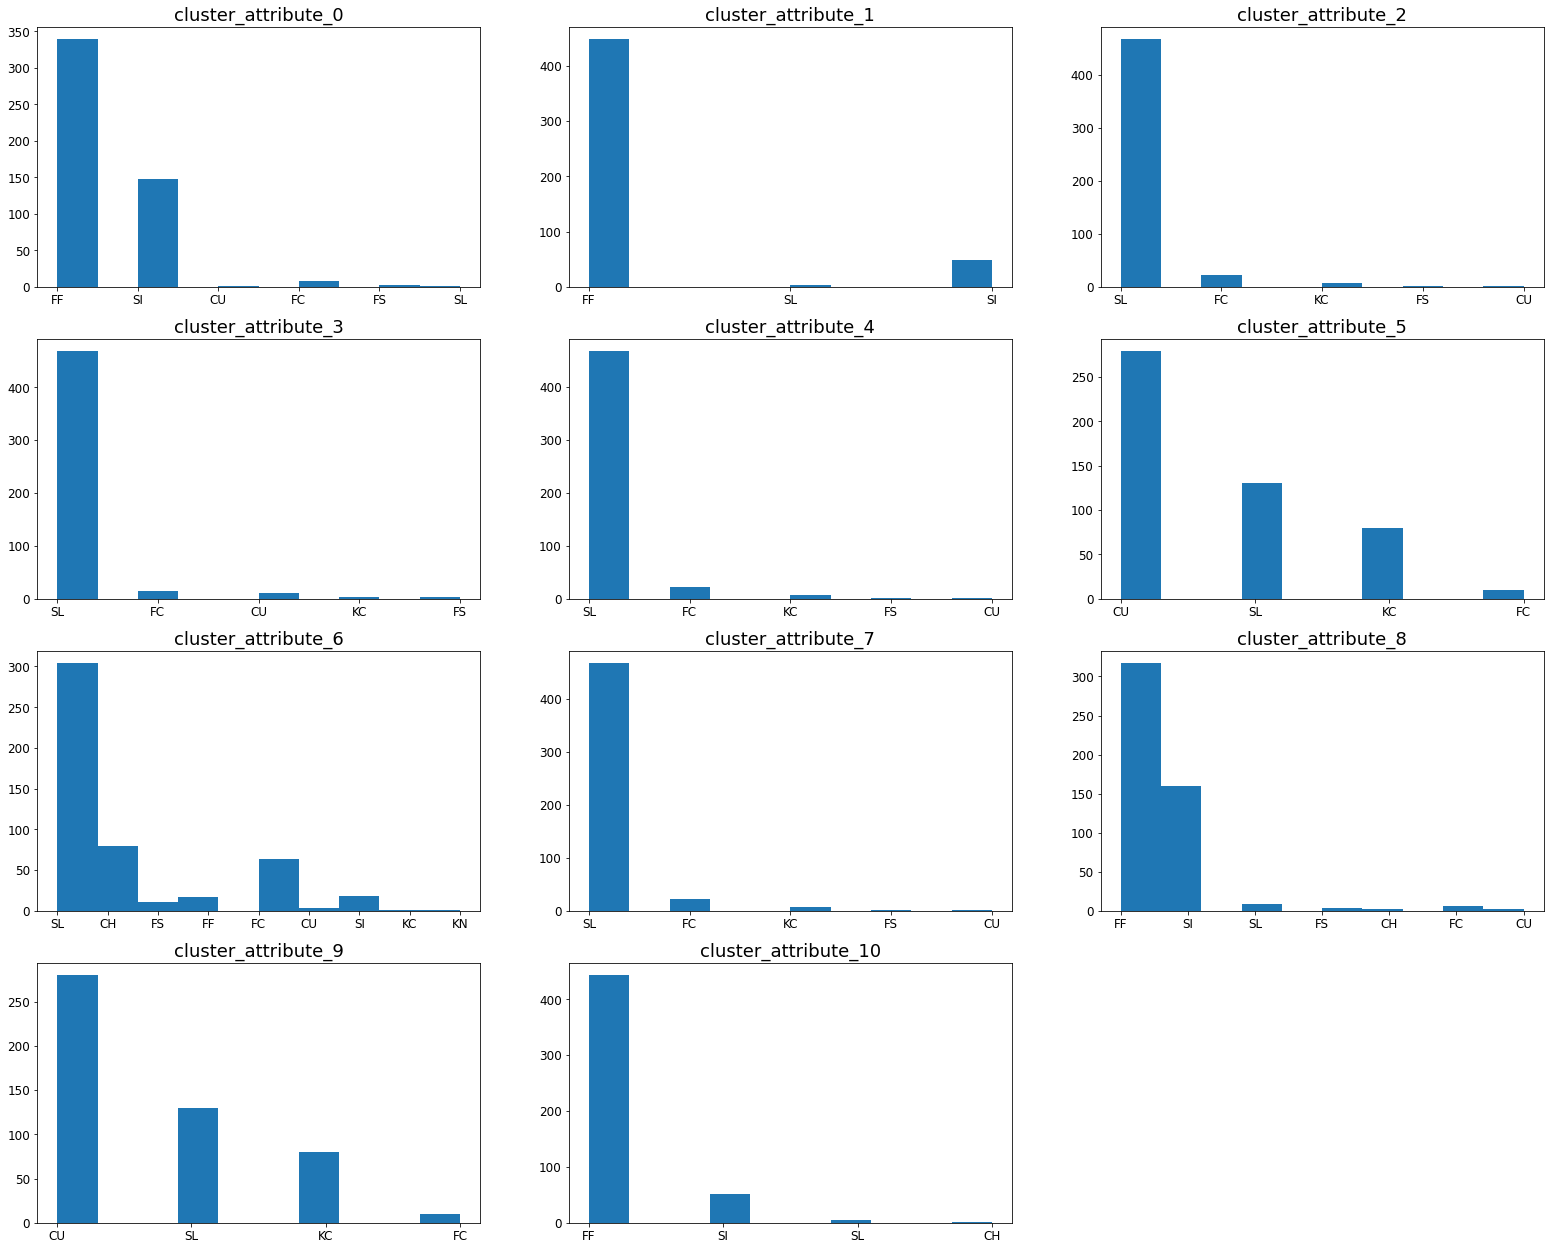

In [12]:
hist_graph('pitch_type')

# Pitcher Handedness

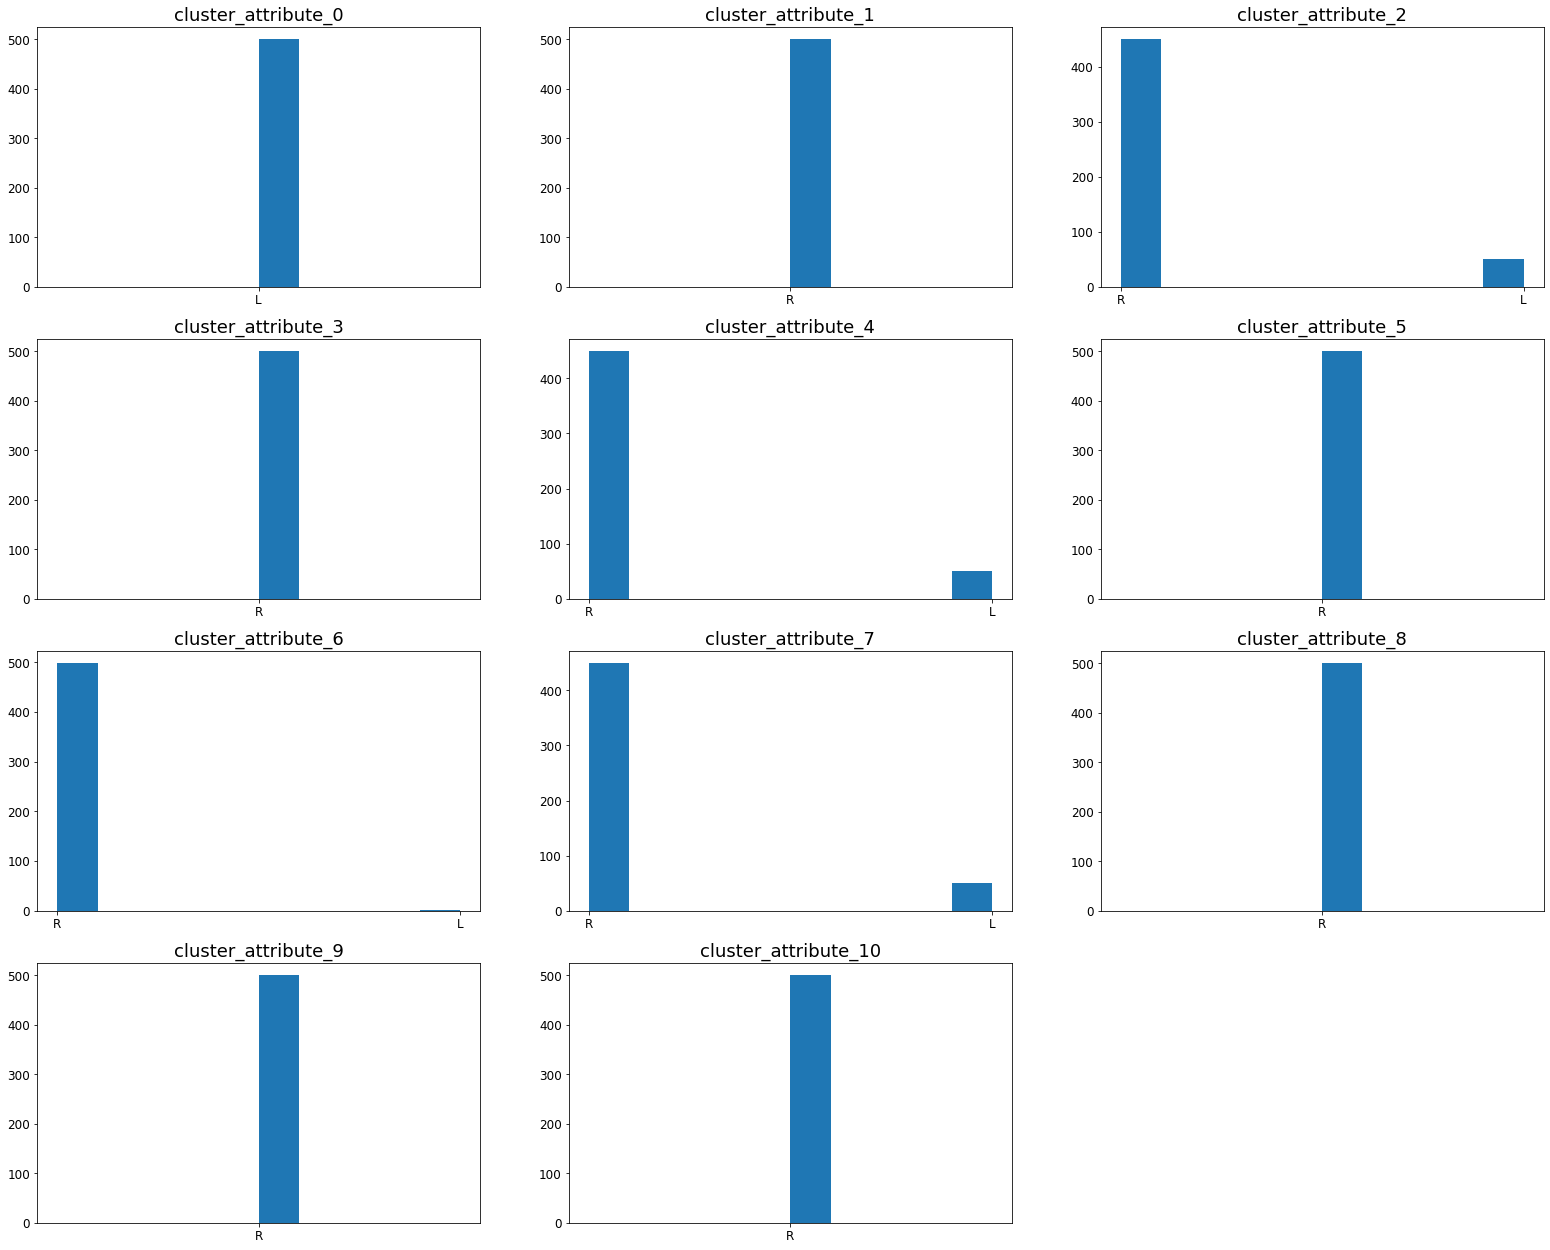

In [13]:
hist_graph('p_throws')

# Effective Speed

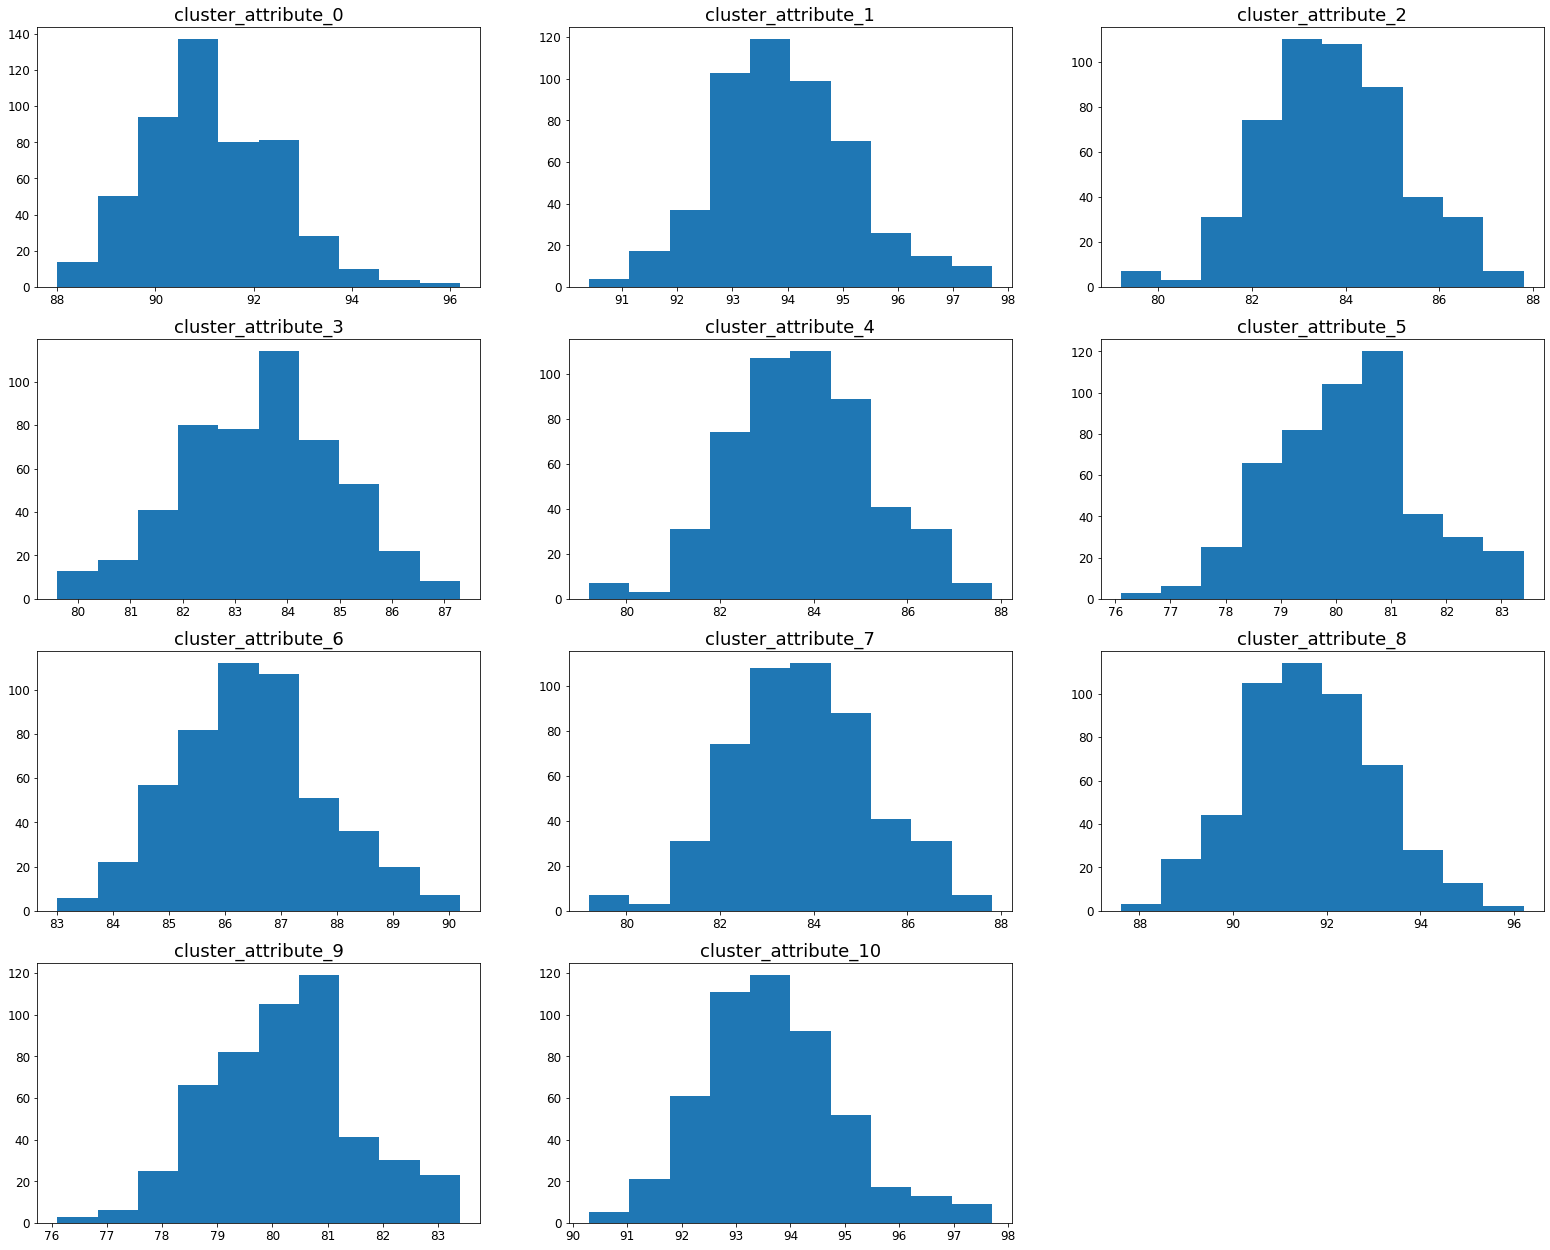

In [14]:
hist_graph('effective_speed')

# Release Speed

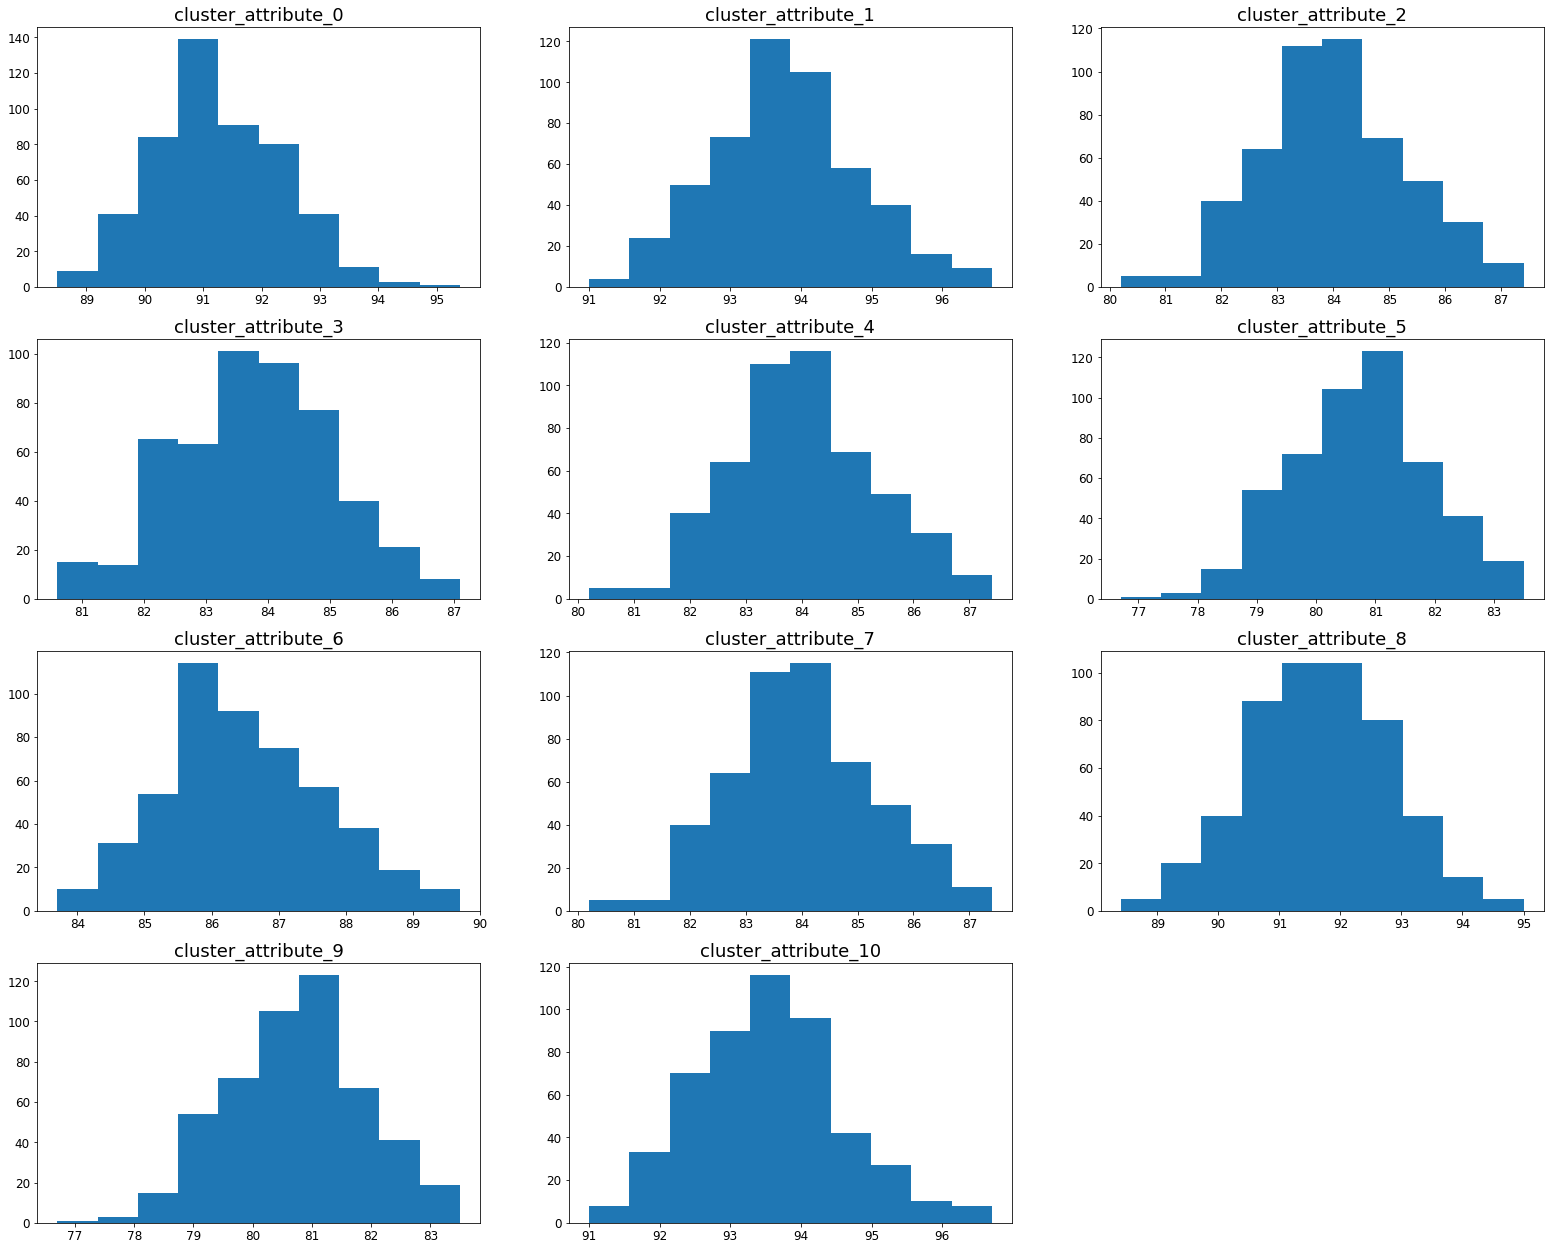

In [15]:
hist_graph('release_speed')

# Scatter of Velocity, Spin-x and Spin-z

spin_x = spin rate in direction of first to third base (vertical axis) <br>
spin_z = spin rate in direction of pitcher mound to home plate (horizontal axis from first to third)

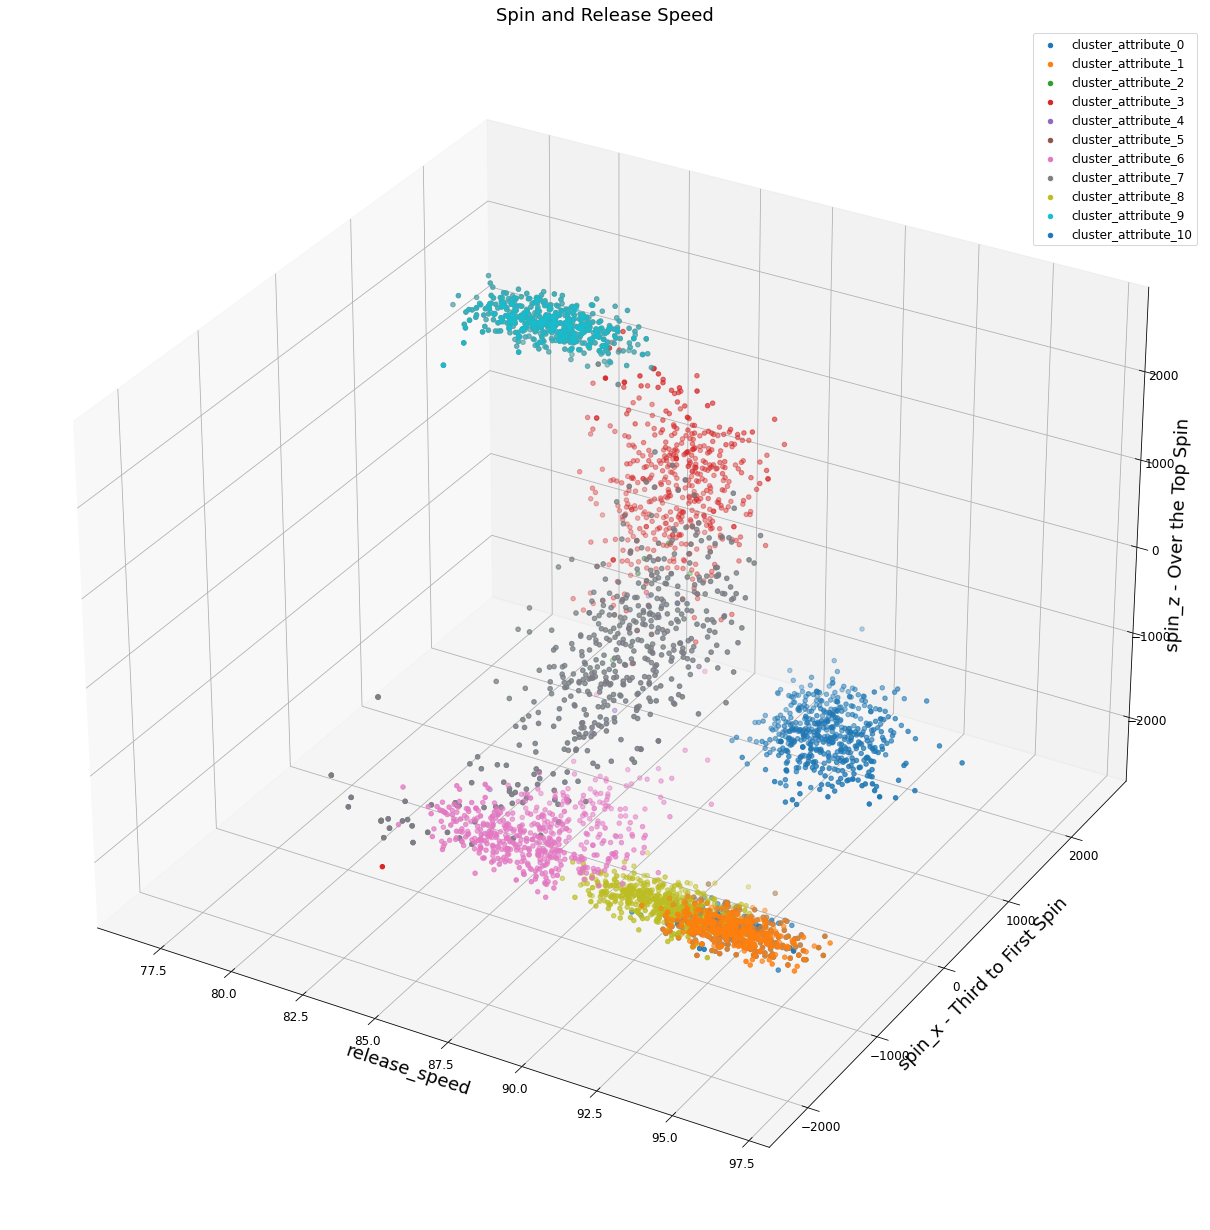

In [16]:
fig = plt.figure(figsize=(27, 22))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111, projection='3d')
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['release_speed'],df_temp['spin_x'],df_temp['spin_z'],label=cluster_cols[i])
    ax.set_xlabel('release_speed')
    ax.set_ylabel('spin_x - Third to First Spin')
    ax.set_zlabel('spin_z - Over the Top Spin')
    ax.set_title('Spin and Release Speed')
    
plt.legend()
plt.show()

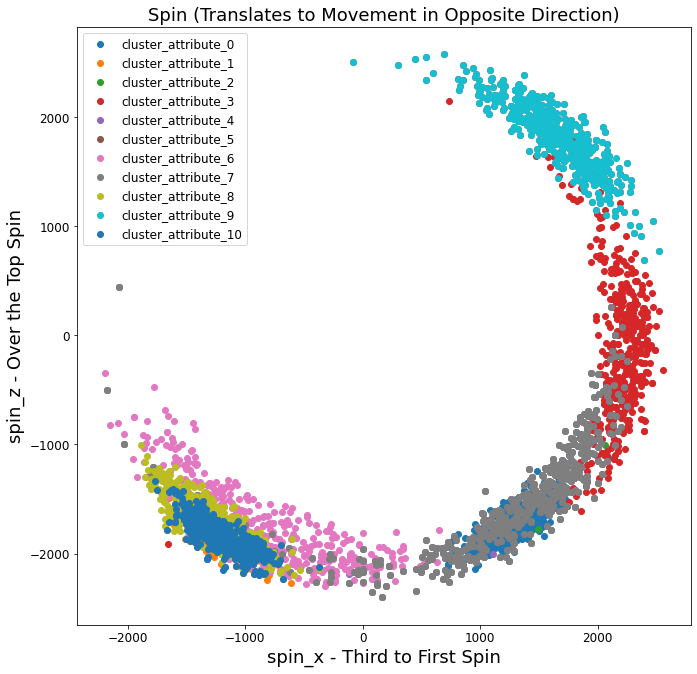

In [17]:
fig = plt.figure(figsize=(11, 11))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111)
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['spin_x'],df_temp['spin_z'],label=cluster_cols[i])
    ax.set_xlabel('spin_x - Third to First Spin')
    ax.set_ylabel('spin_z - Over the Top Spin')
    ax.set_title('Spin (Translates to Movement in Opposite Direction)')
    
plt.legend()
plt.show()

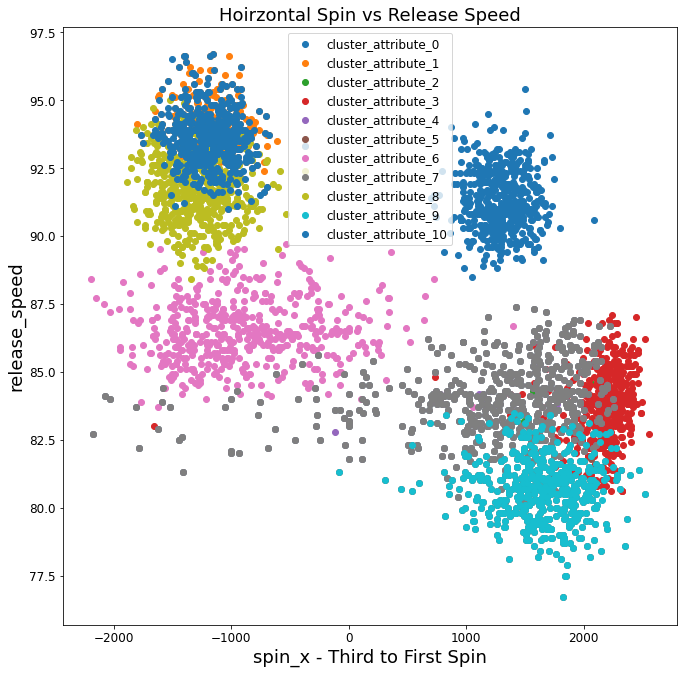

In [18]:
fig = plt.figure(figsize=(11, 11))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111)
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['spin_x'],df_temp['release_speed'],label=cluster_cols[i])
    ax.set_xlabel('spin_x - Third to First Spin')
    ax.set_ylabel('release_speed')
    ax.set_title('Hoirzontal Spin vs Release Speed')
    
plt.legend()
plt.show()

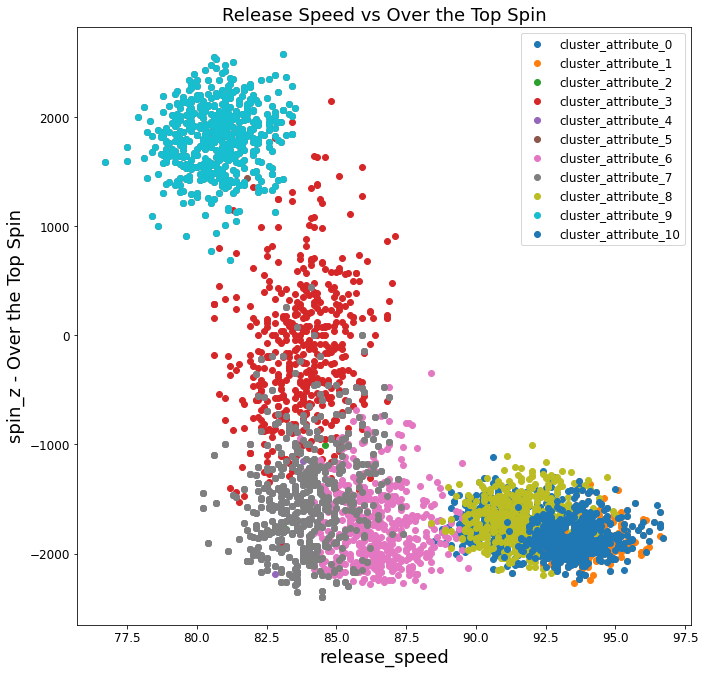

In [19]:
fig = plt.figure(figsize=(11, 11))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111)
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['release_speed'],df_temp['spin_z'],label=cluster_cols[i])
    ax.set_xlabel('release_speed')
    ax.set_ylabel('spin_z - Over the Top Spin')
    ax.set_title('Release Speed vs Over the Top Spin')
    
plt.legend()
plt.show()

# Scatter Release Position

release_pos_x = Horizontal Release Point from catcher perspective <br>
release_pos_y = Release point in feet from catcher <br>
release_pos_z = Vertical Release Point from catcher perspective


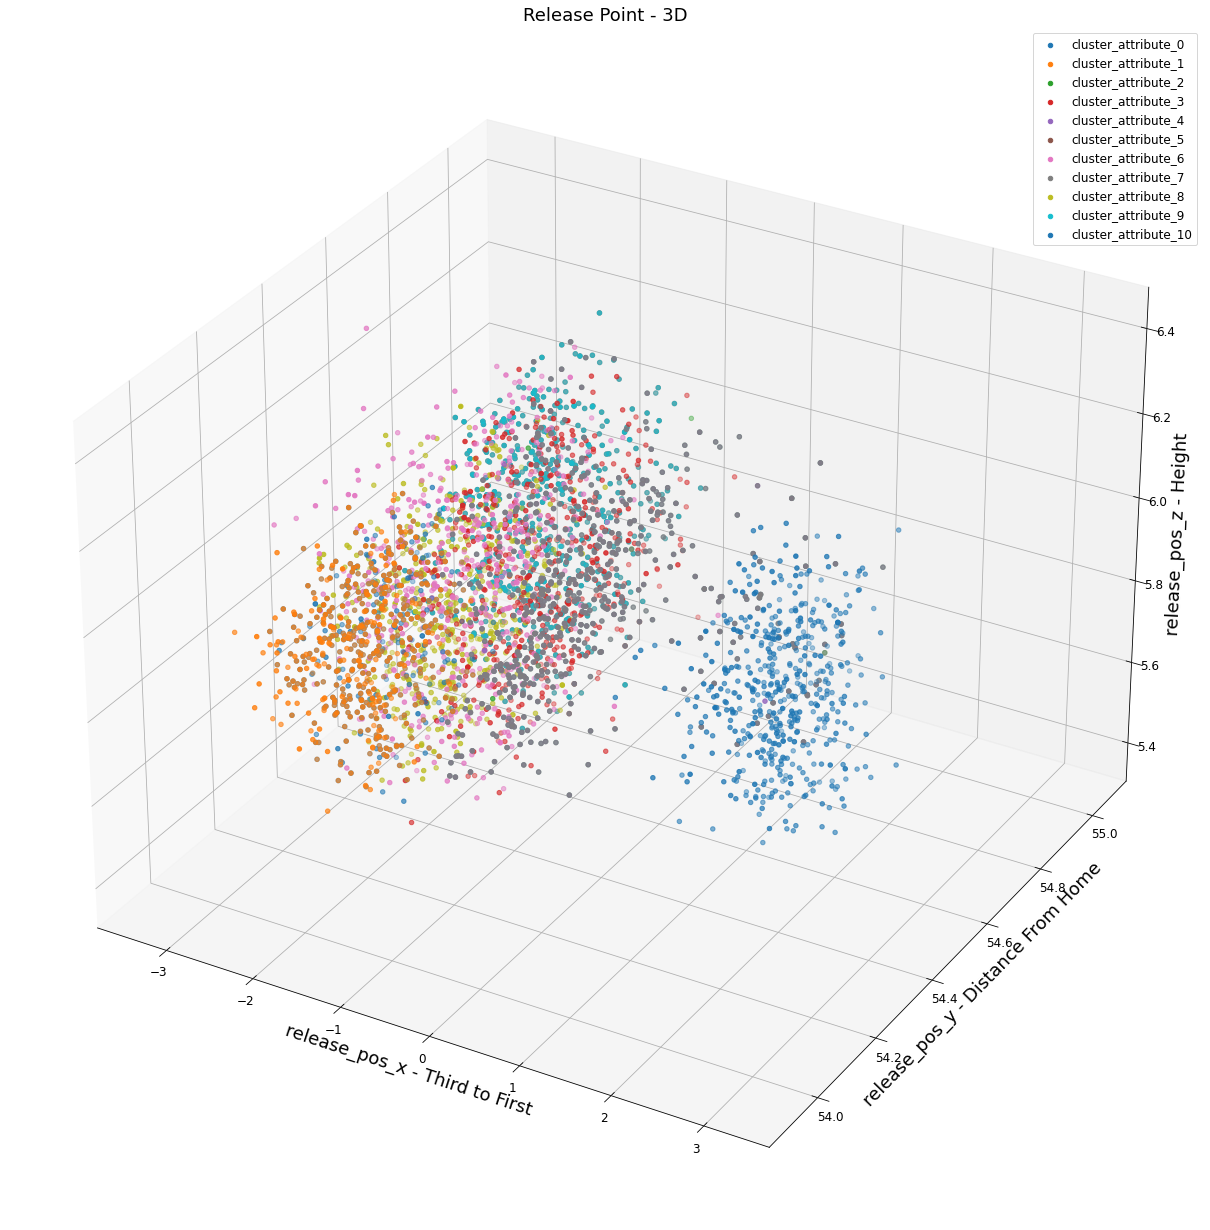

In [20]:
fig = plt.figure(figsize=(27, 22))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111, projection='3d')
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['release_pos_x'],df_temp['release_pos_y'],df_temp['release_pos_z'],label=cluster_cols[i])
    ax.set_xlabel('release_pos_x - Third to First')
    ax.set_ylabel('release_pos_y - Distance From Home')
    ax.set_zlabel('release_pos_z - Height')
    ax.set_title('Release Point - 3D')
    
plt.legend()
plt.show()

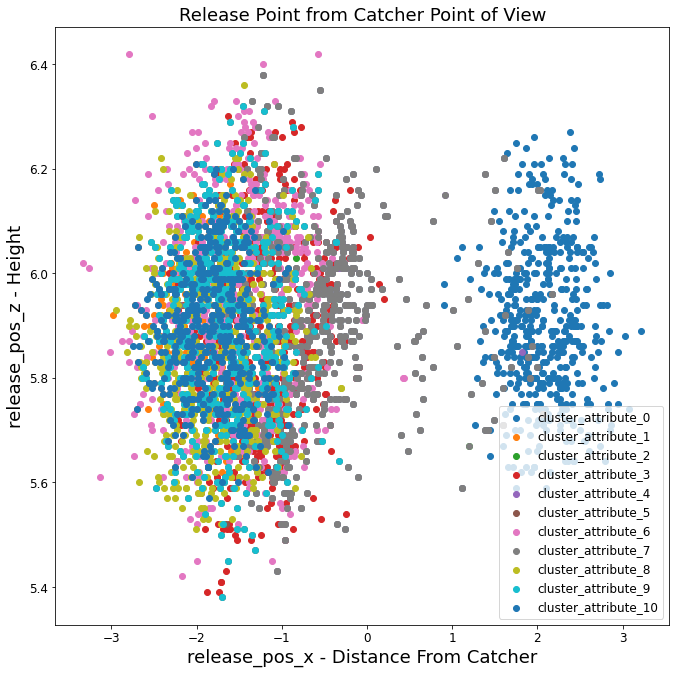

In [21]:
fig = plt.figure(figsize=(11, 11))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111)
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['release_pos_x'],df_temp['release_pos_z'],label=cluster_cols[i])
    ax.set_xlabel('release_pos_x - Distance From Catcher')
    ax.set_ylabel('release_pos_z - Height')
    ax.set_title('Release Point from Catcher Point of View')
    
plt.legend()
plt.show()

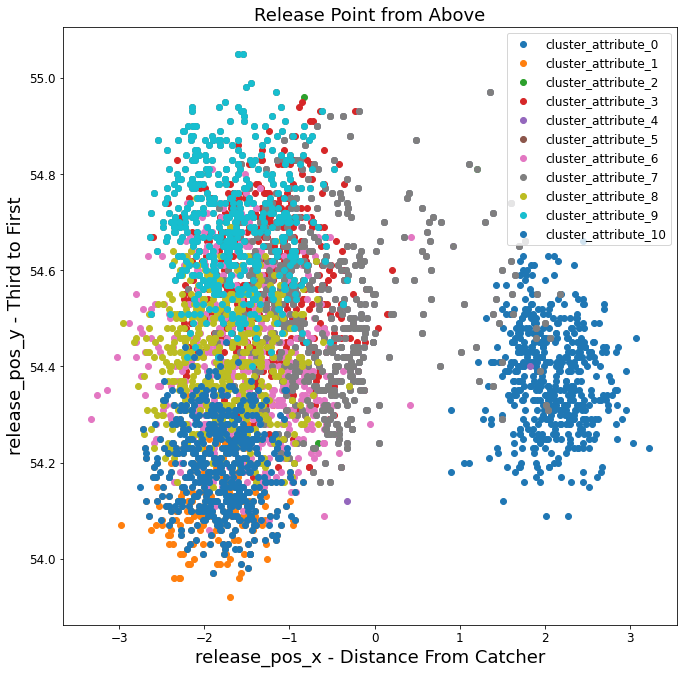

In [22]:
fig = plt.figure(figsize=(11, 11))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111)
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['release_pos_x'],df_temp['release_pos_y'],label=cluster_cols[i])
    ax.set_xlabel('release_pos_x - Distance From Catcher')
    ax.set_ylabel('release_pos_y - Third to First')
    ax.set_title('Release Point from Above')
    
plt.legend()
plt.show()

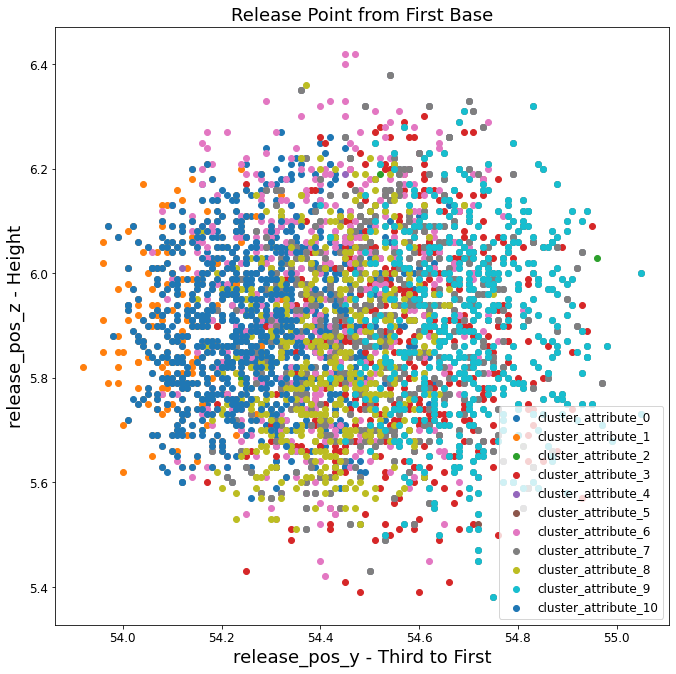

In [23]:
fig = plt.figure(figsize=(11, 11))

plt.title = ("Scatter of Velocity, Spin-x and Spin-z")
ax = fig.add_subplot(111)
    
for i in range(0,len(cluster_cols)):
    df_temp = clusters_close[cluster_cols[i]]
    ax.scatter(df_temp['release_pos_y'],df_temp['release_pos_z'],label=cluster_cols[i])
    ax.set_xlabel('release_pos_y - Third to First')
    ax.set_ylabel('release_pos_z - Height')
    ax.set_title('Release Point from First Base')
    
plt.legend()
plt.show()